<a href="https://colab.research.google.com/github/simonm3/published/blob/master/Copy_of_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#https://developers.google.com/earth-engine/python_install
#You 1st need to sign up your Google account here: https://earthengine.google.com/ (it takes a couple of hours to get accepted. The API won't work before.)
import ee
import folium
from IPython.display import Image
!pip install earthengine-api
ee.Authenticate()
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/swEUlvLrGM6rzT2QogtQMPp0oXBl7YiuDte1HDOl28gTRBf4cNarnyM

Successfully saved authorization token.


### Generates an interactive Map (tutorial code)

In [0]:
# Import libraries.
import ee
import folium

# Initialize the Earth Engine library.
ee.Initialize()

# Define a method for displaying Earth Engine image tiles to folium map.
def add_ee_layer(self, eeImageObject, visParams, name):
  mapID = ee.Image(eeImageObject).getMapId(visParams)
  folium.raster_layers.TileLayer(
    tiles = "https://earthengine.googleapis.com/map/"+mapID['mapid']+
      "/{z}/{x}/{y}?token="+mapID['token'],
    attr = "Map Data © Google Earth Engine",
    name = name,
    overlay = True,
    control = True
  ).add_to(self)

# Add EE drawing method to folium.
folium.Map.add_ee_layer = add_ee_layer

# Fetch an elevation model.
# dem = ee.Image('USGS/SRTMGL1_003')
dem = ee.Image('USGS/SRTMGL1_003')

# Set visualization parameters.
visParams = {'min':0, 'max':3000, 'palette':['225ea8','41b6c4','a1dab4','ffffcc']}

# Create a folium map object.
myMap = folium.Map(location=[20, 0], zoom_start=3, height=500)

# Add the elevation model to the map object.
# myMap.add_ee_layer(dem, visParams, 'DEM')

nighttimeLights = dem.select('avg_vis')
nighttimeLightsVis = {min: 3.0,max: 60.0}
myMap.add_ee_layer(nighttimeLights, nighttimeLightsVis, 'Nighttime Lights');

# Add a layer control panel to the map.
myMap.add_child(folium.LayerControl())

# Display the map.
display(myMap)

EEException: ignored

Night lights Nigeria

In [0]:
#I found the JS code here: https://github.com/google/earthengine-api
# Create a folium map object.
myMap = folium.Map(location=[9.0820, 8.6753], zoom_start=6, height=1000)

# Adds a band containing image date as years since 1991.
def createTimeBand(img):
  year = ee.Date(img.get('system:time_start')).get('year').subtract(1991)
  return ee.Image(year).byte().addBands(img)


# Map the time band creation helper over the night-time lights collection.
# https://developers.google.com/earth-engine/datasets/catalog/NOAA_DMSP-OLS_NIGHTTIME_LIGHTS
collection = ee.ImageCollection('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS').select('stable_lights').map(createTimeBand)

# Compute a linear fit over the series of values at each pixel, visualizing
# the y-intercept in green, and positive/negative slopes as red/blue.
myMap.add_ee_layer(collection.reduce(ee.Reducer.linearFit()),{'bands':['scale', 'offset', 'scale'], 'min': 0, 'max': [0.18, 20, -0.18]},'stable lights trend')

# Add a layer control panel to the map.
myMap.add_child(folium.LayerControl())

# Display the map.
display(myMap)

In [0]:
collection.reduce?

Air Temperature

In [0]:
# Create a folium map object.
myMap = folium.Map(location=[9.0820, 8.6753], zoom_start=6, height=1000)

# Adds a band containing image date as years since 1991.
def createTimeBand(img):
  year = ee.Date(img.get('system:time_start')).get('year').subtract(1991)
  return ee.Image(year).byte().addBands(img)


# Map the time band creation helper over the night-time lights collection.
# https://developers.google.com/earth-engine/datasets/catalog/NOAA_DMSP-OLS_NIGHTTIME_LIGHTS
collection = ee.ImageCollection('ECMWF/ERA5/DAILY').select('maximum_2m_air_temperature').filter(ee.Filter.date('2019-07-01', '2019-07-31'))

# Compute a linear fit over the series of values at each pixel, visualizing
# the y-intercept in green, and positive/negative slopes as red/blue.
visParams = {
  'min': 250,
  'max': 320,
  'palette': [
    '#000080', '#0000D9', '#4000FF', '#8000FF', '#0080FF', '#00FFFF', '#00FF80',
    '#80FF00', '#DAFF00', '#FFFF00', '#FFF500', '#FFDA00', '#FFB000', '#FFA400',
    '#FF4F00', '#FF2500', '#FF0A00', '#FF00FF'
  ]
}
myMap.add_ee_layer(collection.reduce(ee.Reducer.median()),visParams,'mean 2m air temperature')

# Add a layer control panel to the map.
myMap.add_child(folium.LayerControl())

# Display the map.
display(myMap)

In [0]:
collection.reduce?

Generates a satelite video evolution of the selected region (currently not working)

In [0]:
#initial snippet found here: https://geoscripting-wur.github.io/Earth_Engine/
import ee
from ee import batch
## Initialize connection to server
ee.Initialize()
## Define your image collection
#collection = ee.ImageCollection('LANDSAT/LC8_L1T_TOA')
collection = ee.ImageCollection('ECMWF/ERA5/DAILY')
## Define time range
collection_time = collection.filterDate('2013-04-11', '2018-01-01') #YYYY-MM-DD
## Select location based on location of tile
path = collection_time.filter(ee.Filter.eq('WRS_PATH', 198))
pathrow = path.filter(ee.Filter.eq('WRS_ROW', 24))
# or via geographical location:
#point_geom = ee.Geometry.Point(5, 52) #longitude, latitude
#pathrow = collection_time.filterBounds(point_geom)
## Select imagery with less then 5% of image covered by clouds
clouds = pathrow.filter(ee.Filter.lt('CLOUD_COVER', 5))
## Select bands
bands = clouds.select(['B4', 'B3', 'B2'])
## Make 8 bit data
def convertBit(image):
    return image.multiply(512).uint8()  
## Convert bands to output video  
outputVideo = bands.map(convertBit)
print("Starting to create a video")
## Export video to Google Drive
out = batch.Export.video.toDrive(outputVideo, description='Nigeria_video_region_L8_time', dimensions = 720, framesPerSecond = 2, region=([8.6753,9.0820], [8.6753, 9.0820],[8.6753, 9.0820],[8.6753, 9.0820]), maxFrames=10000)
## Process the image
process = batch.Task
process.start(out)
print("Process sent to cloud")

Starting to create a video
Process sent to cloud


In [0]:
process.status(out)

{'creation_timestamp_ms': 1572961002177,
 'description': 'Nigeria_video_region_L8_time',
 'id': 'ZZUHXBEJBUXCELJ4DHLNHQFO',
 'state': 'READY',
 'task_type': 'EXPORT_VIDEO',
 'update_timestamp_ms': 1572961002177}

In [0]:
process.list()

[<Task EXPORT_VIDEO: Nigeria_video_region_L8_time (FAILED)>,
 <Task EXPORT_VIDEO: Nigeria_video_region_L8_time (FAILED)>,
 <Task EXPORT_VIDEO: Nigeria_video_region_L8_time (FAILED)>,
 <Task EXPORT_VIDEO: Nigeria_video_region_L8_time (FAILED)>,
 <Task EXPORT_VIDEO: Nigeria_video_region_L8_time (FAILED)>,
 <Task EXPORT_VIDEO: Netherlands_video_region_L8_time (COMPLETED)>]

In [0]:
print(outputVideo)

ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "collection": {
      "type": "Invocation",
      "arguments": {
        "collection": {
          "type": "Invocation",
          "arguments": {
            "collection": {
              "type": "Invocation",
              "arguments": {
                "collection": {
                  "type": "Invocation",
                  "arguments": {
                    "collection": {
                      "type": "Invocation",
                      "arguments": {
                        "collection": {
                          "type": "Invocation",
                          "arguments": {
                            "id": "LANDSAT/LC8_L1T_TOA"
                          },
                          "functionName": "ImageCollection.load"
                        },
                        "filter": {
                          "type": "Invocation",
                          "arguments": {
                            "rightField": 

In [0]:
print(dem)

ee.Image({
  "type": "Invocation",
  "arguments": {
    "id": "USGS/SRTMGL1_003"
  },
  "functionName": "Image.load"
})


In [0]:
print(pathrow)

ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "collection": {
      "type": "Invocation",
      "arguments": {
        "collection": {
          "type": "Invocation",
          "arguments": {
            "collection": {
              "type": "Invocation",
              "arguments": {
                "id": "LANDSAT/LC8_L1T_TOA"
              },
              "functionName": "ImageCollection.load"
            },
            "filter": {
              "type": "Invocation",
              "arguments": {
                "rightField": "system:time_start",
                "leftValue": {
                  "type": "Invocation",
                  "arguments": {
                    "start": "2013-04-11",
                    "end": "2018-01-01"
                  },
                  "functionName": "DateRange"
                }
              },
              "functionName": "Filter.dateRangeContains"
            }
          },
          "functionName": "Collection.filter"
       

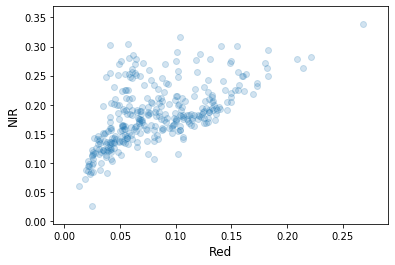

In [0]:
# Import libraries.
import ee
import matplotlib.pyplot as plt

# Initialize the Earth Engine module.
ee.Initialize()

# Fetch a Landsat image.
img = ee.Image('LANDSAT/LT05/C01/T1_SR/LT05_034033_20000913')

# Select Red and NIR bands, scale them, and sample 500 points.
sampFC = img.select(['B3','B4']).divide(10000).sample(scale=30, numPixels=500)

# Arrange the sample as a list of lists.
sampDict = sampFC.reduceColumns(ee.Reducer.toList().repeat(2), ['B3', 'B4'])
sampList = ee.List(sampDict.get('list'))

# Save server-side ee.List as a client-side Python list.
sampData = sampList.getInfo()

# Display a scatter plot of Red-NIR sample pairs using matplotlib.
plt.scatter(sampData[0], sampData[1], alpha=0.2)
plt.xlabel('Red', fontsize=12)
plt.ylabel('NIR', fontsize=12)
plt.show()